In [1]:
import numpy as np
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784') #손글씨 데이터

#sklearn 버전에 따라서 아래 코드를 사용해야되는 경우도 있습니다.

# from sklearn.datasets import fetch_mldata
# mnist = fetch_mldata("MNIST original")

#X의 range가 (0, 255)기 때문에 255로 나누어 픽셀의 값들이 0~1 사이가 되도록 정규화 한다.
X = mnist.data / 255.0
y = mnist.target
#y는 각 이미지가 어떤 숫자인지 나타낸다.
print (X.shape, y.shape)     #X는 데이터가 28X28=784로 이미 flatten되어 784차원의 벡터 데이터가 있다.

(70000, 784) (70000,)


In [4]:
import pandas as pd

feat_cols = ['pixel'+str(i) for i in range(X.shape[1])]     #feat_cols를 pixel0, pixel1, ... pixel783으로 설정

df = pd.DataFrame(X,columns=feat_cols)      #X를 dataframe으로 바꾸고, column의 이름을 feat_cols에서 설정한 이름으로 설정
df['label'] = y                             #df에 'label'이라는 변수 추가해 y(target)을 dataframe에 추가
df['label'] = df['label'].apply(lambda i: str(i))      #각 label을 문자형(string)으로 변환

X, y = None, None        #X와 y를 None으로 설정

print( 'Size of the dataframe: {}'.format(df.shape) )   #784차원의 data에 label로 target값을 추가했기 때문에 열이 785개. (785차원)

Size of the dataframe: (70000, 785)


In [9]:
#data를 무작위로 섞어 줍니다.

rndperm = np.random.permutation(df.shape[0])    #70000개의 데이터를 랜덤하게 섞어준다.

<Figure size 432x288 with 0 Axes>

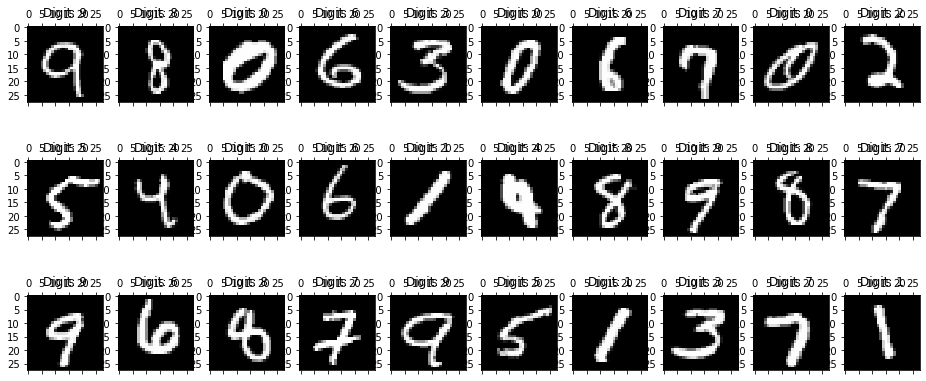

In [10]:
#우리가 다루게 될 데이터가 어떻게 생겼는지 살펴 봅시다.

import matplotlib.pyplot as plt

# Plot the graph
plt.gray()
fig = plt.figure( figsize=(16,7) )
for i in range(0,30):
    ax  = fig.add_subplot(3,10,i+1,title='Digit: ' + str(df.loc[rndperm[i], 'label']) )
    # 한 그래프에 여러개의 subplot을 그리기 위해 3x10의 subplot을 그리는 figure 설정
    #각 plot의 title은 할당된 label의 값
    ax.matshow(df.loc[rndperm[i], feat_cols].values.reshape((28,28)).astype(float))
    #시각화를 위해 784차원의 데이터를 다시 28X28로 변환해 각 pixel값에 대응시킨다.

plt.show()

#아래 데이터는 몇 차원인 것 같나요? -> 각 plot은 784차원(28X28)

In [11]:
#PCA를 이용하여 3차원으로 줄여보자! 왜?
#784차원의 데이터는 계산량이 너무너무 많기 때문에 PCA를 이용해 먼저 1차적으로 차원을 줄여보자

from sklearn.decomposition import PCA

pca = PCA(n_components=3)          #3차원으로 축소
pca_result = pca.fit_transform(df[feat_cols].values)        #차원축소 결과를 pca_result에 저장

df['pca-one'] = pca_result[:,0]        #첫번째 주성분을 pca-one
df['pca-two'] = pca_result[:,1]        #두번째 주성분을 pca-two
df['pca-three'] = pca_result[:,2]      #세번째 주성분을 pca-three 열로 df에 추가

print( 'Explained variation per principle component: {}'.format(pca.explained_variance_ratio_))
#각 주성분의 explained variance ratio값 출력

Explained variation per principle component: [0.09746116 0.07155445 0.06149531]


In [13]:
import time
from sklearn.manifold import TSNE

n_sne = 7000       #70000개의 데이터 중 7000개만 사용

time_start = time.time()    #시작시간
tsne = TSNE(n_components=2, verbose=1, perplexity=40, n_iter=300)     #t-SNE로 2개의 차원으로 축소

#수정된 코드
pca_columns = ['pca-one', 'pca-two', 'pca-three']       #PCA를 축소한 3개의 차원을 pca_columns로 저장

tsne_results = tsne.fit_transform(df.loc[rndperm[:n_sne],pca_columns].values)
#pca_columns의 3개의 성분들로 t-SNE 진행 -> 2차원으로 줄여보자

#예전코드:    tsne_results = tsne.fit_transform(df.loc[rndperm[:n_sne],feat_cols].values)
# feat_cols를 사용했기 때문에 784차원의 데이터 모두 사용해 t-SNE 돌리는 코드

print('t-SNE done! Time elapsed: {} seconds'.format(time.time() - time_start))   ##-> t-SNE에 소요된 시간 출력

[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 7000 samples in 0.015s...
[t-SNE] Computed neighbors for 7000 samples in 0.511s...
[t-SNE] Computed conditional probabilities for sample 1000 / 7000
[t-SNE] Computed conditional probabilities for sample 2000 / 7000
[t-SNE] Computed conditional probabilities for sample 3000 / 7000
[t-SNE] Computed conditional probabilities for sample 4000 / 7000
[t-SNE] Computed conditional probabilities for sample 5000 / 7000
[t-SNE] Computed conditional probabilities for sample 6000 / 7000
[t-SNE] Computed conditional probabilities for sample 7000 / 7000
[t-SNE] Mean sigma: 0.373580
[t-SNE] KL divergence after 250 iterations with early exaggeration: 74.767616
[t-SNE] KL divergence after 300 iterations: 2.114156
t-SNE done! Time elapsed: 25.036139965057373 seconds


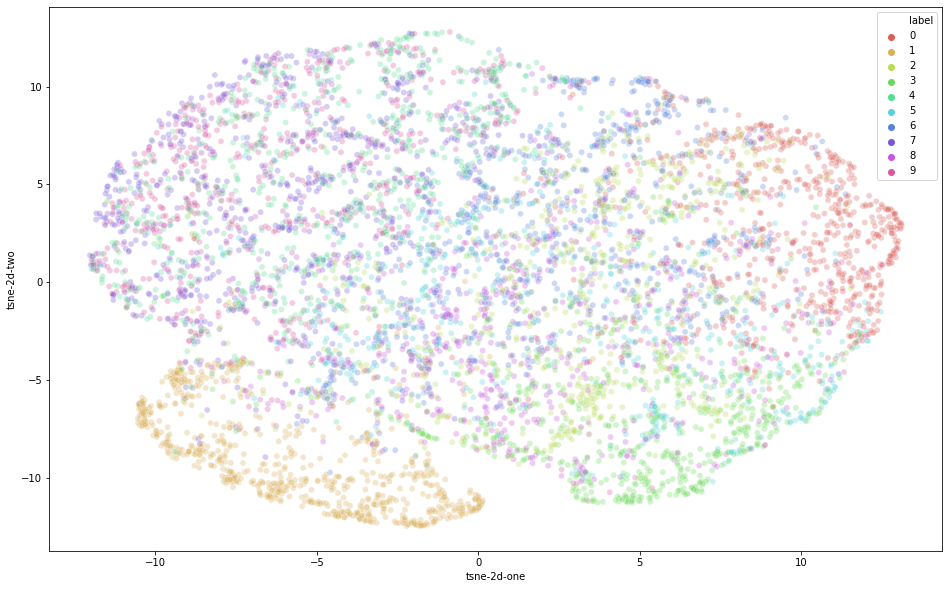

In [14]:
import seaborn as sns

N = 7000

df_subset = df.loc[rndperm[:N],:].copy()     #위에서 추출한 7000개의 데이터를 df_subset에 저장

df_subset['tsne-2d-one'] = tsne_results[:,0]    #df_subset의 column에 tsne_result로 얻은 첫번째 축 저장
df_subset['tsne-2d-two'] = tsne_results[:,1]    #df_subset의 column에 tsne_result로 얻은 두번째 축 저장

plt.figure(figsize=(16,10))
sns.scatterplot(x="tsne-2d-one", y="tsne-2d-two", hue="label",
    palette=sns.color_palette("hls", 10), data=df_subset, legend="full", alpha=0.3)
#tsne-2d-one을 x축, tsne-2d-two를 y축으로 scatter plot을 그려서 확인
#분류가 잘 안된듯 하다,,, pca에서 3개의 차원으로 축소하는 과정에서 잃어버린 정보가 많은 것 같다.
#원래 784차원 데이터를 모두 사용한 scatter plot과 비교해보자!!

In [15]:
#PCA 적용하지 않고 t-SNE 적용

n_sne = 7000       #70000개의 데이터 중 7000개만 사용

time_start = time.time()    #시작시간
tsne = TSNE(n_components=2, verbose=1, perplexity=40, n_iter=300)     #t-SNE로 2개의 차원으로 축소

tsne_results = tsne.fit_transform(df.loc[rndperm[:n_sne],feat_cols].values)
# feat_cols를 사용했기 때문에 784차원의 데이터 모두 사용해 t-SNE 돌리는 코드

print('t-SNE done! Time elapsed: {} seconds'.format(time.time() - time_start))   ##-> t-SNE에 소요된 시간 출력

#차원이 크기 때문에 시간이 오래 걸린다.

[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 7000 samples in 3.247s...
[t-SNE] Computed neighbors for 7000 samples in 131.897s...
[t-SNE] Computed conditional probabilities for sample 1000 / 7000
[t-SNE] Computed conditional probabilities for sample 2000 / 7000
[t-SNE] Computed conditional probabilities for sample 3000 / 7000
[t-SNE] Computed conditional probabilities for sample 4000 / 7000
[t-SNE] Computed conditional probabilities for sample 5000 / 7000
[t-SNE] Computed conditional probabilities for sample 6000 / 7000
[t-SNE] Computed conditional probabilities for sample 7000 / 7000
[t-SNE] Mean sigma: 2.228018
[t-SNE] KL divergence after 250 iterations with early exaggeration: 83.077957
[t-SNE] KL divergence after 300 iterations: 2.442719
t-SNE done! Time elapsed: 161.62587094306946 seconds


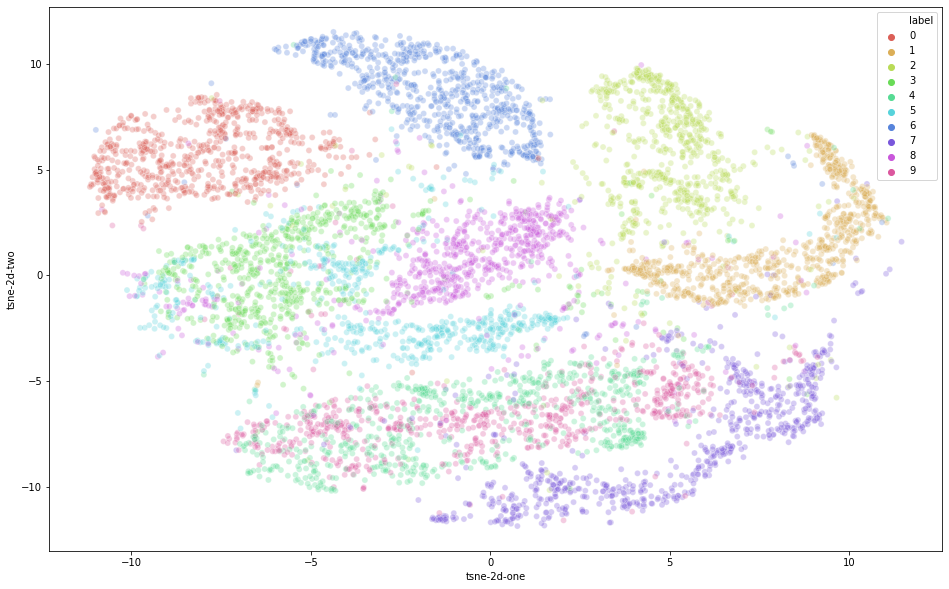

In [16]:
N = 7000

df_subset = df.loc[rndperm[:N],:].copy()     #위에서 추출한 7000개의 데이터를 df_subset에 저장

df_subset['tsne-2d-one'] = tsne_results[:,0]    #df_subset의 column에 tsne_result로 얻은 첫번째 축 저장
df_subset['tsne-2d-two'] = tsne_results[:,1]    #df_subset의 column에 tsne_result로 얻은 두번째 축 저장

plt.figure(figsize=(16,10))
sns.scatterplot(x="tsne-2d-one", y="tsne-2d-two", hue="label",
    palette=sns.color_palette("hls", 10), data=df_subset, legend="full", alpha=0.3)

#PCA 진행후 2차원으로 축소한 것보다 더 분류가 잘 된것을 볼 수 있다.

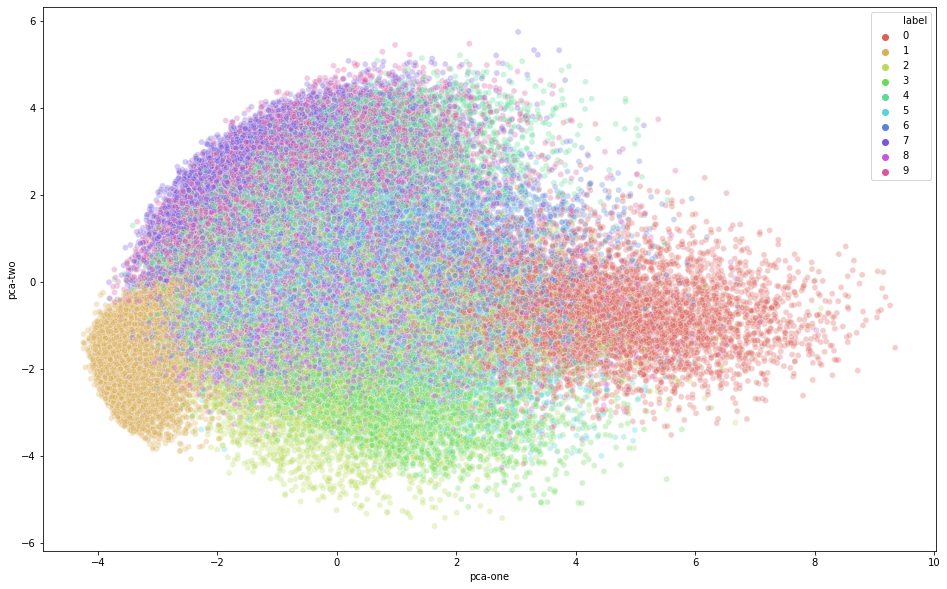

In [17]:
# PCA 만 사용한 경우

plt.figure(figsize=(16,10))
sns.scatterplot(
    x="pca-one", y="pca-two", hue="label",
    palette=sns.color_palette("hls", 10),
    data=df.loc[rndperm,:], legend="full", alpha=0.3)

#전체 70000개의 데이터로 scatter plot을 그렸다.
#그룹별로 묶였지만 경계가 불분명하다.
#뚜렷한 군집화가 보이지 않기 때문에 시각화에는 부적절하다.

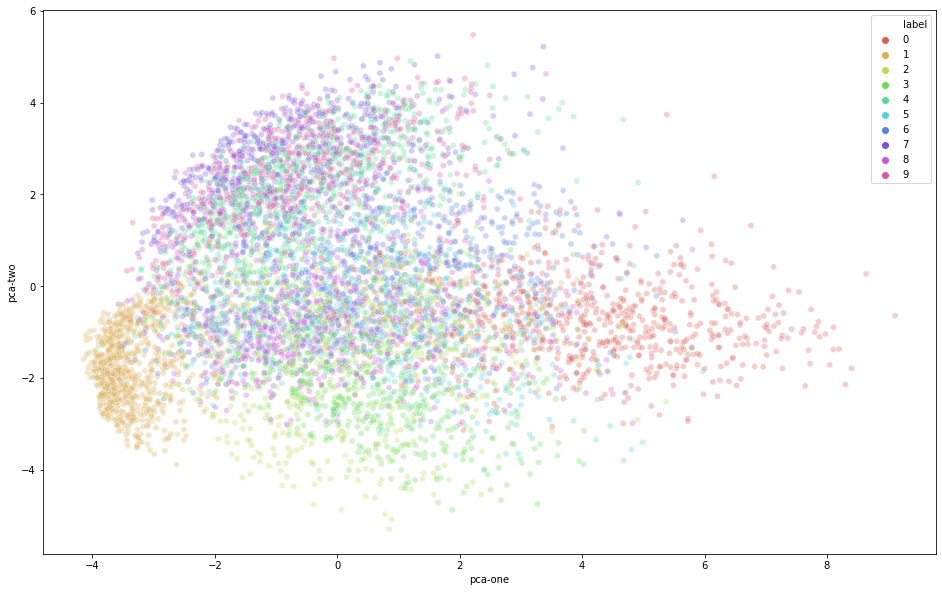

In [18]:
N = 7000
plt.figure(figsize=(16,10))
sns.scatterplot(
    x="pca-one", y="pca-two", hue="label",
    palette=sns.color_palette("hls", 10),
    data=df.loc[rndperm[:N],:], legend="full", alpha=0.3)

#data를 7000개로 줄여봐도 그룹간 경계가 불분명하게 나타난다.